# Linear Regression using Gradient Descent

We want to solve linear regression using Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

# Part 0: getting the data

**Remark about the data**: here, we work with a **toy example** where the data is generated from a linear relationship + some noise. So, we can actually read the true value of the coefficients. 

But of course, **in real life, you do not have access** to the true model which generated the data, and certainly not access to its parameters either !

#### We help you create the data

In [2]:
def createData(N,theta0,theta1,sigmaNoise): 
    Xrange = 10
    D = 1
    ## x are random
    X = np.random.random((N,D))*Xrange   
    ## the "y" (ordinates axis) are y=a.x+b + noise
    noise = np.random.normal(0,sigmaNoise, (N,D))
    y = theta0 + theta1*X + noise   # not available in real life

    theta = np.array([theta0, theta1]).reshape((2,1))
    Xaugmented = np.hstack((np.ones((N,1)) , X )) # this is really a 1, not a D !
    y2 = (Xaugmented @ theta) + noise
    
    print("difference in the 2 methods:",  (abs(y-y2)).sum()  )
    
    return X, y

In [3]:
######### data creation #########
seed=42
np.random.seed(seed)
N=100
theta0=1.1                                                           # not available in real life
theta1=0.5                                                         # not available in real life
sigmaNoise = 0.5                                                   # not available in real life
X, y = createData(N,theta0,theta1,sigmaNoise) ## training data 
Ntest=N//2
Xtest, ytest = createData(Ntest,theta0,theta1,sigmaNoise) ## test data

difference in the 2 methods: 0.0
difference in the 2 methods: 0.0


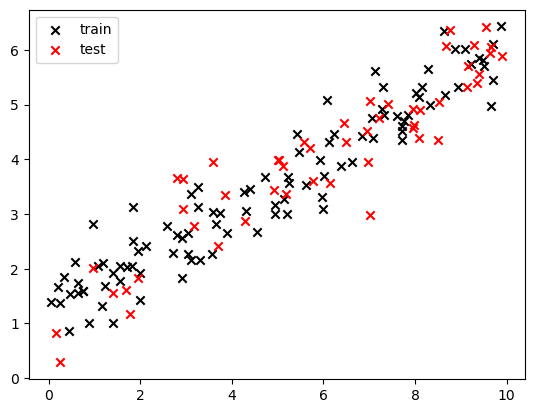

In [4]:
####### data visualization ###########
plt.figure()
plt.scatter(X,y, label="train", marker='x',color='k')
plt.scatter(Xtest,ytest, label= "test", marker='x',color='red')
plt.legend()

# Part 1: handcrafted model

## 1. Model defintion, initalization

- create a model, i.e. a function $f_\Theta(x)$
- choose hyper-parameters `eta`, `MaxIter`, and set the dimension of data `D` appropriately
- make a stupid or random guess for an initial value of the parameters vector `theta`, i.e. for `thetaInitial`

Let's think about what we're asked.

- The data here is very simple: $x$ is 1-dimensional (D=1) and so is $y$.
- The model is linear (you can take a richer model like 2nd order polynomial but it's dangerous !)
- so the model is just "$y=ax+b$", or in modern notations, $y=\theta_0+\theta_1 x$.
- So the dimension of teh parameters array/list/container should be : 2 parameters: `theta[0]` and `theta[1]`, is `theta` is a 2-components array.

In [5]:
### the model ###
def model(X, theta):
    ## a simple linear function
    return (theta[0]+theta[1]*X)

In [6]:
#### hyper-parameters #####
eta=0.01  # learning rate 
MaxIter = 500
D=1 ## dimension of the (input) data: 1.
P=1 ## order of our polynomial model that we choose: P=1
C=D+1 ## model complexity: 2 parameters

In [7]:
## initialization (in a sense, a hyper-parameter)
thetaInitial = np.array([1.2,0.6]) # .reshape((2,1))
thetaInitial = np.random.random(D+1)-0.5 # random initialization

### Remark about the auxiliary ones trick:

If you prefer to write things using the trick of augmented X, to use more matrix operations, 
- you're right !
- go see the d-dimensional case, where the data X is defined with its augmented component (filled with ones)

But if you prefer not to, for now, it's ok.

## 2. Update rule

### Now the crucial part 

- **take a piece of paper and a pencil, and derive the update rule for your function $f_\Theta(x)$**, according to the method of Grandient Descent. Really do it on paper, not on the computer !!
Use the Mean Squared Error Loss.

### Now to code it

- implement a function `fit(model, eta, MaxIter, D, theta, X, y)` that will update the parameters according to gradient descent
- run it !
- add a recording of train and test error to your fit function, so as to keep track of train and test error at all iterations of the algorithm

In [8]:
def fit(model, eta, MaxIter, D, theta, X, y, Xtest, ytest):
    trainError = np.zeros(MaxIter)
    testError = np.zeros(MaxIter)
    for iteration in range(MaxIter):
        temp = eta*2*(model(X, theta) - y) ## the first term in the parentheses
        theta[0] -= 1./N*np.sum(temp*1)     # the first   row in the vector notation 
        theta[1] -= 1./N*np.sum(temp*X)     # the second  row in the vector notation 
        trainError[iteration] = np.mean( (model(X, theta)-y)**2 )
        testError[iteration] = np.mean( (model(Xtest, theta)-ytest)**2 )
    return theta, trainError, testError

In [9]:
def fit(model, eta, MaxIter, D, theta, X, y, Xtest, ytest):
    trainError = np.zeros(MaxIter)
    testError = np.zeros(MaxIter)
    for iteration in range(MaxIter):
        temp = eta*2/N*(model(X, theta) - y) ## the first term in the parentheses
        theta[0] -= np.sum(temp*1)         # the first   row in the vector notation 
        theta[1] -= X.T @ temp             # the second  row in the vector notation 
        trainError[iteration] = np.mean( (model(X, theta)-y)**2 )
        testError[iteration] = np.mean( (model(Xtest, theta)-ytest)**2 )
    return theta, trainError, testError

In [10]:
theta = thetaInitial.copy()
theta, trainError, testError = fit(model, eta, MaxIter, D, theta, X, y, Xtest, ytest)
## even cleaner, we could use a class model, and there would be a method fit in it.
## for now we go slowly with python..
theta, thetaInitial

(array([1.11971453, 0.49051121]), array([-0.32679813, -0.06614835]))

### Follow the results 

- plot the data (train and test), the initial guess, and the final model (all 4 things on a single graph).
- on a separate plot, show the *training error* and *test errror* evolution over the iterations (epochs)

train error: 0.20383629033385697
test error: 0.3038493934225545 
theta: [1.11971453 0.49051121]


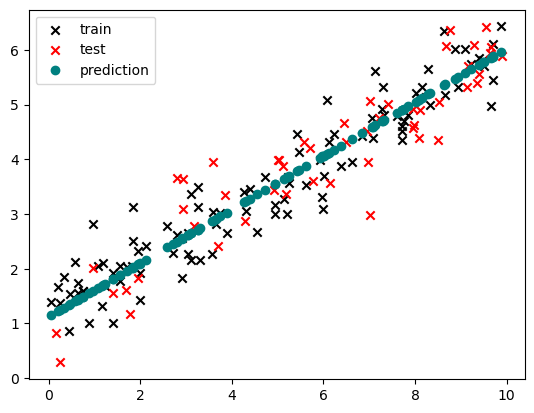

In [11]:
## plot the data, the noiseless-teacher, the model that was learned
plt.figure(1)
plt.scatter(X,y, label="train", marker='x',color='k')
plt.scatter(Xtest,ytest, label= "test", marker='x',color='red')

print("train error:", np.mean( (model(X, theta)-y)**2 ) )
print("test error:", np.mean( (model(Xtest, theta)-ytest)**2 ) , "\ntheta:", theta)
plt.plot(X, model(X, theta), color='teal', marker="o", ls="", label="prediction")
plt.legend()

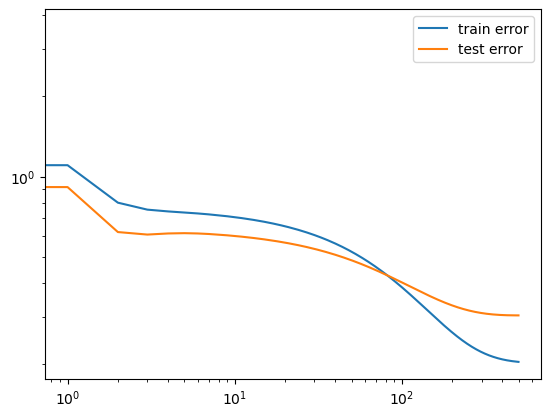

In [12]:
## follow the evolution of train and test accuracy or error
epochs = np.arange(MaxIter)
plt.figure(2)
plt.loglog(epochs, trainError, label='train error')
plt.loglog(epochs, testError, label='test error')
plt.legend()
#print(epochs)

# Part 2: sklearn solution

## Comparing with the sklearn implementation

We can now cheat using `sklearn`, to check wether our results are consistent with it (they will often be *slightly*  different!)

In [13]:
## check these lines at home   ##
import sklearn
from sklearn import datasets

from sklearn.linear_model import LinearRegression
reg_sklearn_object = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
Xreshaped = X.reshape((N,1))
reg_sklearn_object.fit(Xreshaped,y)

Xtest_resh = Xtest.reshape((Ntest,1))
print(reg_sklearn_object.score(Xreshaped, y))
print(reg_sklearn_object.score(Xtest_resh, ytest))
print("theta: coeffs fitted by sklearn: ", reg_sklearn_object.intercept_, reg_sklearn_object.coef_)


0.9081437156468248
0.8597536205958003
theta: coeffs fitted by sklearn:  [1.20754808] [[0.47701134]]


c:\Users\stefa\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [14]:
theta_sklearn = np.array([reg_sklearn_object.intercept_, reg_sklearn_object.coef_[0]])

train error: 0.20164614099176334
test error: 0.3052647417554088 theta: [1.11971453 0.49051121]


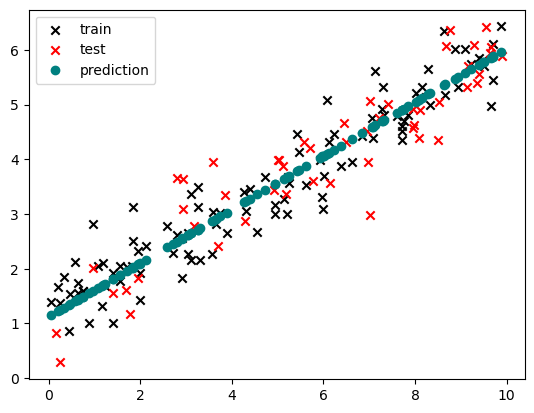

In [15]:
## plot the data, the noiseless-teacher, the model that was learned
plt.figure(1)
plt.scatter(X,y, label="train", marker='x',color='k')
plt.scatter(Xtest,ytest, label= "test", marker='x',color='red')

print("train error:", np.mean( (model(X, theta_sklearn)-y)**2 ) )
print("test error:", np.mean( (model(Xtest, theta_sklearn)-ytest)**2 ) , "theta:", theta)
plt.plot(X, model(X, theta), color='teal', marker="o", ls="", label="prediction")
plt.legend()

In [16]:
reg_sklearn_object.coef_

array([[0.47701134]])

# Part 3:  the augmented X trick:

### Warning:

Make sure to complete the pen-and-paper exercise 1.1.2 of "Regressions.pdf" before trying to do this !

In [17]:
# we add ones where we need them
Xa        = np.hstack((np.ones((N,1))    , X))
Xtest_aug = np.hstack((np.ones((Ntest,1)), Xtest))
theta_aug = thetaInitial.reshape(D+1,1)

In [18]:
def model2(X, theta):
    return X@theta

In [19]:
def fit_augmented(model, eta, MaxIter, D, theta, X, y, Xtest, ytest):
    trainError = np.zeros(MaxIter)
    testError = np.zeros(MaxIter)
    for iteration in range(MaxIter):
        theta -= X.T @ (eta*2/N*( X @ theta - y)) # 1 line !
        trainError[iteration] = np.mean( (model(X, theta)-y)**2 )
        testError[iteration] = np.mean( (model(Xtest, theta)-ytest)**2 )
    return theta, trainError, testError

In [20]:
 theta, trainError, testError = fit_augmented(model2, eta, MaxIter, D, theta_aug, Xa, y, Xtest_aug, ytest)

In [21]:
theta

array([[1.11971453],
       [0.49051121]])